In [2]:
#required lib..
import numpy as np
import pandas as pd

# Visualization 
import matplotlib.pyplot as plt
import seaborn as sns

#import model libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

#import model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR

from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error

from sklearn.model_selection import cross_val_score


Loading dataset :

age: age of primary beneficiary

sex: insurance contractor gender, female, male

bmi: Body mass index, providing an understanding of body, weights that are relatively high or low relative to height,
objective index of body weight (kg / m ^ 2) using the ratio of height to weight, ideally 18.5 to 24.9

children: Number of children covered by health insurance / Number of dependents

smoker: Smoking

region: the beneficiary's residential area in the US, northeast, southeast, southwest, northwest.

charges: Individual medical costs billed by health insurance

In [3]:
  # importing dataset by using direct link of github repo.. 
  
data = pd.read_csv("https://raw.githubusercontent.com/stedy/Machine-Learning-with-R-datasets/master/insurance.csv")

Exploring dataset ⁉

» What kind of data do we have and how do we treat different kinds?

What is missing from the data and how to deal with it?

Where are the outliers?

, How can you add, change or remove features to get more out of the data?


In [ ]:
data.shape

(1338, 7)

In [5]:
data.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


In [ ]:
# statical summary of data 

data.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [ ]:
##Value counts for every columns
for column in data.columns:
    print(data[column].value_counts())
    print('*' * 20)

18    69
19    68
50    29
51    29
47    29
46    29
45    29
20    29
48    29
52    29
22    28
49    28
54    28
53    28
21    28
26    28
24    28
25    28
28    28
27    28
23    28
43    27
29    27
30    27
41    27
42    27
44    27
31    27
40    27
32    26
33    26
56    26
34    26
55    26
57    26
37    25
59    25
58    25
36    25
38    25
35    25
39    25
61    23
60    23
63    23
62    23
64    22
Name: age, dtype: int64
********************
male      676
female    662
Name: sex, dtype: int64
********************
32.300    13
28.310     9
30.495     8
30.875     8
31.350     8
          ..
46.200     1
23.800     1
44.770     1
32.120     1
30.970     1
Name: bmi, Length: 548, dtype: int64
********************
0    574
1    324
2    240
3    157
4     25
5     18
Name: children, dtype: int64
********************
no     1064
yes     274
Name: smoker, dtype: int64
********************
southeast    364
southwest    325
northwest    325
northeast    324
Name: region, 

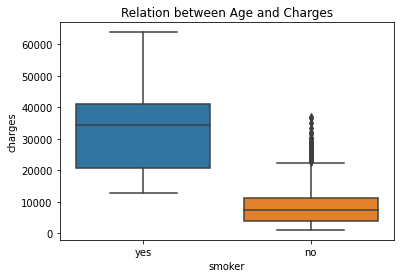

In [ ]:
# Relation between Age and Charges

plt.title('Relation between Age and Charges')
sns.boxplot(x=data['smoker'],y=data['charges'])
plt.show()


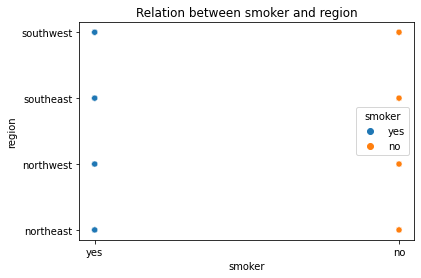

In [ ]:
# Relation between smoker and region by scatterplot

plt.title('Relation between smoker and region')
sns.scatterplot(x=data['smoker'],y=data['region'], hue = data['smoker'])
plt.show()

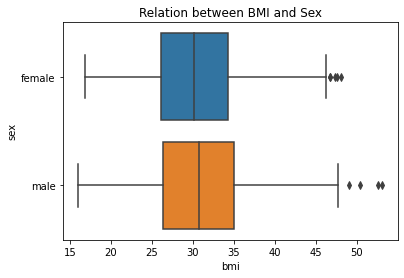

In [ ]:
# 'Relation between BMI and Sex by scatterplot

plt.title('Relation between BMI and Sex')
sns.boxplot(x=data['bmi'],y=data['sex'])
plt.show()


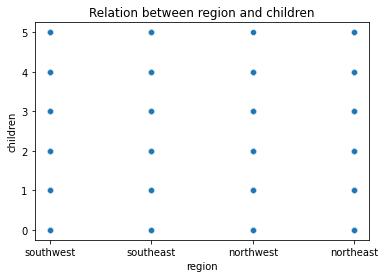

In [ ]:
plt.title('Relation between region and children')
sns.scatterplot(x=data['region'],y=data['children'])
plt.show()

equal number of children in every region

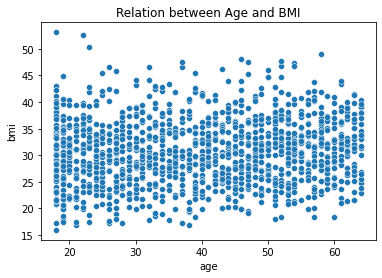

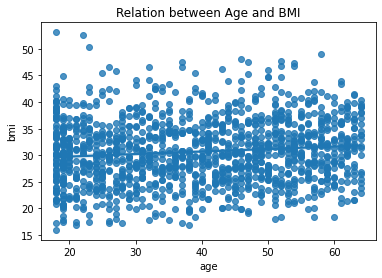

In [ ]:
# Relation between Age and BMI

plt.title('Relation between Age and BMI')
sns.scatterplot(x=data['age'],y=data['bmi'])
plt.show()
plt.title('Relation between Age and BMI')
sns.regplot(x=data['age'],y=data['bmi'])
plt.show()

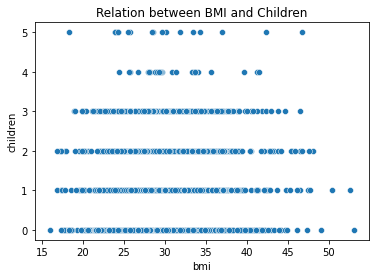

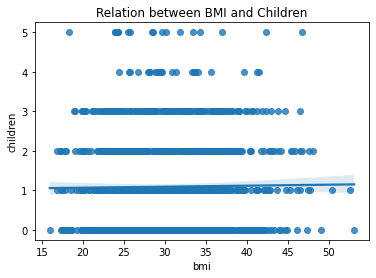

In [ ]:
# Relation between BMI and Children

plt.title('Relation between BMI and Children')
sns.scatterplot(x=data['bmi'],y=data['children'])
plt.show()
plt.title('Relation between BMI and Children')
sns.regplot(x=data['bmi'],y=data['children'])
plt.show()


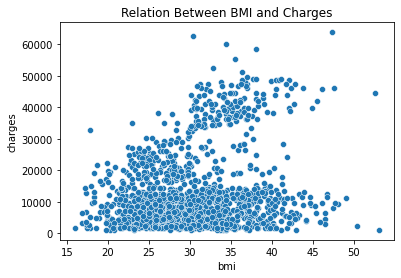

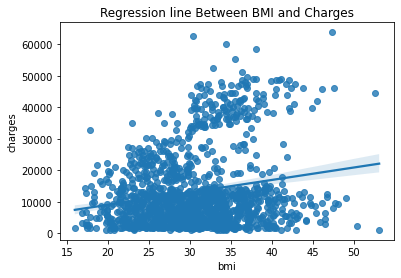

In [ ]:
# Relation Between BMI and Charges

plt.title('Relation Between BMI and Charges')
sns.scatterplot(x = data['bmi'], y= data['charges'])
plt.show()
plt.title('Regression line Between BMI and Charges')
sns.regplot(x = data['bmi'] , y = data['charges'])
plt.show()

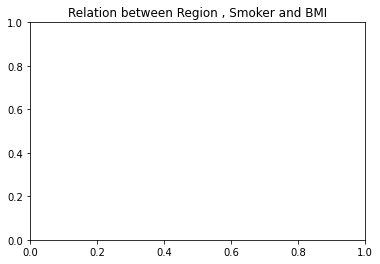

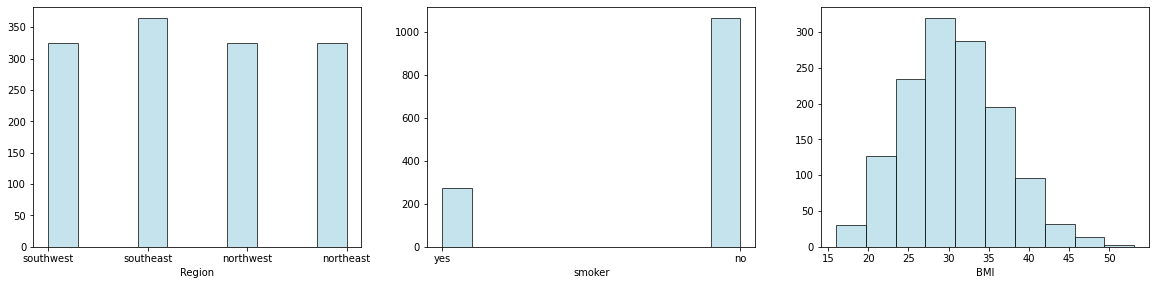

In [ ]:
plt.title('Relation between Region , Smoker and BMI')
plt.figure(figsize= (20,15))
plt.subplot(3,3,1)
plt.hist(data.region, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('Region')

plt.subplot(3,3,2)
plt.hist(data.smoker, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('smoker')

plt.subplot(3,3,3)
plt.hist(data.bmi, color='lightblue', edgecolor = 'black', alpha = 0.7)
plt.xlabel('BMI')

plt.show()

In [ ]:
data.dtypes

age           int64
sex          object
bmi         float64
children      int64
smoker       object
region       object
charges     float64
dtype: object